<a href="https://colab.research.google.com/github/HenriqueMAP/imersao-dados-3-alura/blob/main/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios da Imersão Dados 3ª Edição




## Aula 1: Python, Pandas e Pharmacia
### Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.
---
### Desafio 02: Plotar as 5 últimas linhas da tabela.
---
### Desafio 03: Proporção das classes de tratamento.
---
### Desafio 04: Quantos tipos de drogas foram investigados?
---
### Desafio 05: Procurar na documentação do Pandas sobre o método query.
---
### Desafio 06: Renomear as colunas removendo o hífen.
---
### Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot.
---
### Desafio 08: Resumir o que você aprendeu.

## Resposta do Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.

### Quantidade de tratamentos utilizando drogas VS não utilizando drogas (com_controle)

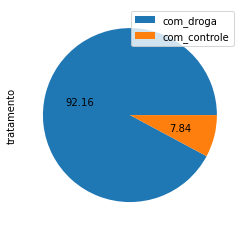

In [1]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
tipos_tratamentos = dados['tratamento'].value_counts().plot.pie(
    labels=None,
    autopct="%.2f",
    legend=True,
    figsize=(4, 4),
    )

Resposta (Parte 1): Embora a quantidade de tratamentos utilizando drogas seja igual a 21 948, em contrapartida, a quantidade de tratamentos sem drogas (com_controle) é igal a 1 866. A princípio parece ser uma desproporcionalidade, mas isso só fica visível dessa forma, porque a análise nesse ponto é rasa, superficial, e precisa ser aprofundada.

### Quantidade da utilização de cada tipo de substância / composto

In [2]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace = True)
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
3276db5ea       1
6fbceecd4       1
ddb7e0c01       1
f2cc15da6       1
Name: composto, Length: 3289, dtype: int64

Resposta (Parte 2): Para aprofundar essa análise, é necessário identificar se existem mais de uma substância utilizadas no tratamento sem drogas. Neste caso, é possível identificar que a substância utilizada foi apenas a denominada cacb2b860. Note que ao contar quantas vezes ela é utilizada, encontramos o mesmo valor de 1866 utilizado quando verificamos quantos tratamentos foram realizados anteriormente. Confira abaixo que somente existe essa subtância quando filtramos a coluna de "tratamento" para o valor de "com_controle".

### Verificação de substâncias utilizadas no tratamento "com_controle"

In [3]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

### Quantidade de utilização das substâncias

In [4]:
pd.crosstab(dados['composto'], dados['tratamento'])

tratamento,com_controle,com_droga
composto,,
00199ff52,0,6
00251fc41,0,6
00321ea80,0,12
0034c0847,0,6
0060e686f,0,6
...,...,...
ff9565933,0,6
ffd66e220,0,6
ffe357f8f,0,1


Resposta (Parte 3): O método crosstab do Pandas retornou a quantidade de vezes que cada tipos de substância / droga foi utilizada nos 23 814 tratamentos. 

Desse valor, sabemos que precisamos subtrair a quantidade de tratamentos realizados sem drogas, que corresponde a 1866 tratamentos. 

Assim, restam 21 948, dos quais podemos verificar com o retorno acima que são exatamente 3288 drogas utilizadas, sendo que retiramos 1 do total de linhas que o cross tab retorna devido a substância do tratamento com controle.

E se utilizarmos dados['composto'].value_counts() podemos ver que a droga mais utilizada á a denominada como 87d714366, da qual é utilizada 718 vezes. 

Agora sabendo disso, percebemos que a quantidade de tratamentos não utilizando drogas foi maior que qualquer tratamento utilizando uma droga específica. Ou seja, não existe nenhuma desproporcionalidade.

In [5]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
3276db5ea       1
6fbceecd4       1
ddb7e0c01       1
f2cc15da6       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 02: Plotar as 5 últimas linhas da tabela.

In [6]:
dados.tail(5)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Resposta do Desafio 03: Proporção das classes de tratamento.

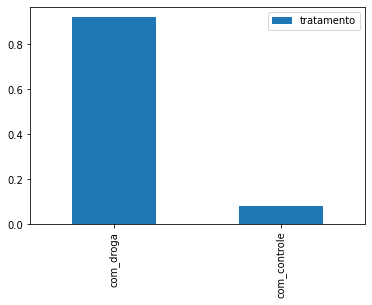

In [7]:
proporcao_tratamentos = dados['tratamento'].value_counts(normalize = True).plot.bar(legend=True)

## Resposta do Desafio 04: Quantos tipos de drogas foram investigados?

Conforme mostrado na célula abaixo, temos um total de 3289 compostos = 3288 drogas + 1 substância para tratamento sem drogas (cacb2b860).

In [8]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
18a406358       1
3276db5ea       1
6fbceecd4       1
ddb7e0c01       1
f2cc15da6       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 05: Procurar na documentação do Pandas sobre o método query.

In [9]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

## Resposta do Desafio 06: Renomear as colunas removendo o hífen.

In [10]:
number = 0
colunas = list(dados.columns)
titulo=[]
for number in range(number,len(colunas)):
  titulo.append(colunas[number].replace("-", " "))
  mapa={str(colunas[number]):str(titulo[number])}
  dados.rename(columns=mapa, inplace=True)
  number += 1

dados.head()

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## Resposta do Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot


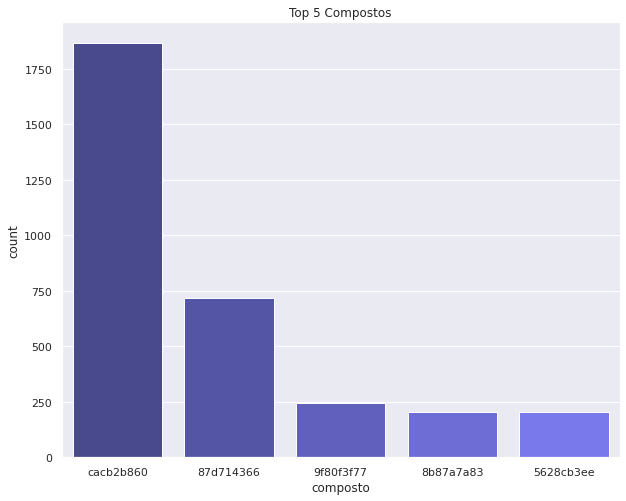

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_compostos = dados['composto'].value_counts().index[0:5]
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'),  order=cod_compostos, palette=('#3d3d99', '#4747b3', '#5252cc','#5c5ce6', '#6666ff'))
ax.set_title('Top 5 Compostos')
plt.show()

## Aula 2: Estatísticas, dados e distribuições
### Desafio 01: Ordenar o gráfico countplot.
---
### Desafio 02: Alterar o tamanho da fonte.
---
### Desafio 03: Plotar os histogramas com seaborn.
---
### Desafio 04: Estudar sobre as estatísticas retornadas no método describe().
---
### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
---
### Desafio 06: Realizar outras análises com o boxplot e até com o histograma.


## Resposta do Desafio 01: Ordenar o gráfico countplot.

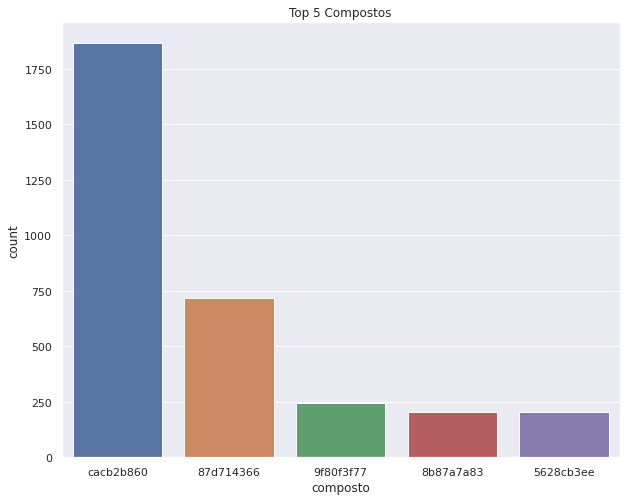

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos')
plt.show()

## Resposta do Desafio 02: Alterar o tamanho da fonte.

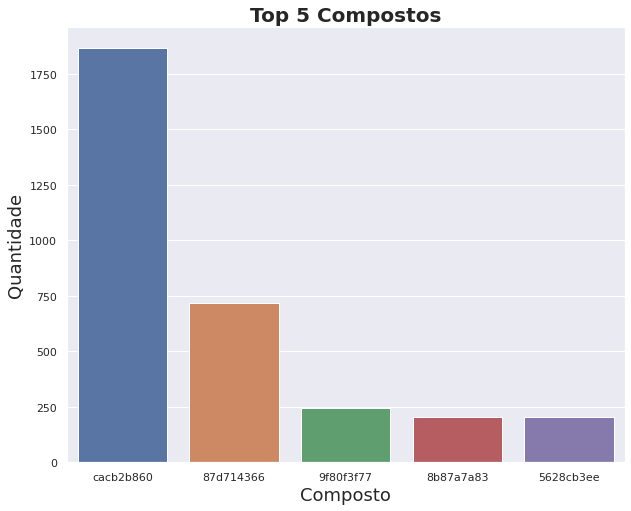

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
plt.show()

## Resposta do Desafio 03: Plotar os histogramas com seaborn

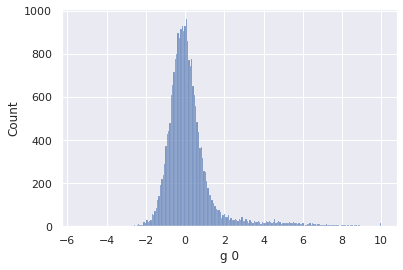

In [14]:
sns.histplot(data=dados['g 0'], bins='auto')

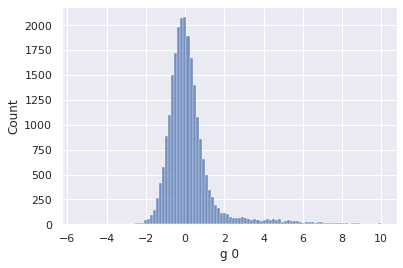

In [15]:
sns.histplot(data=dados['g 0'], bins=100, common_norm=True)

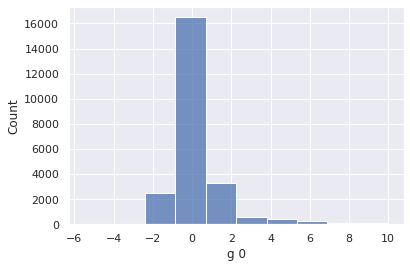

In [16]:
sns.histplot(data=dados['g 0'], bins=10)

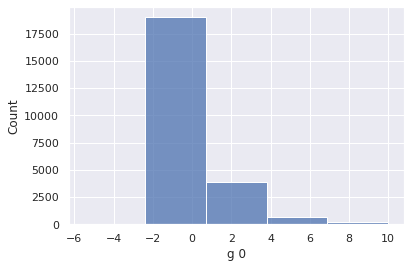

In [17]:
sns.histplot(data=dados['g 0'], bins=5)

## Resposta do Desafio 04: Estudar sobre as estatísticas retornadas no método describe().

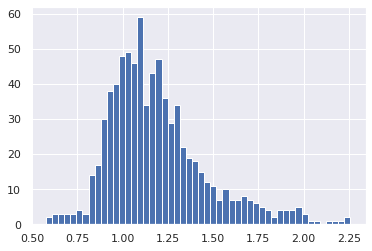

In [18]:
dados.loc[:, 'g 0':'g 771'].describe().T['std'].hist(bins=50)

## Resposta do Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

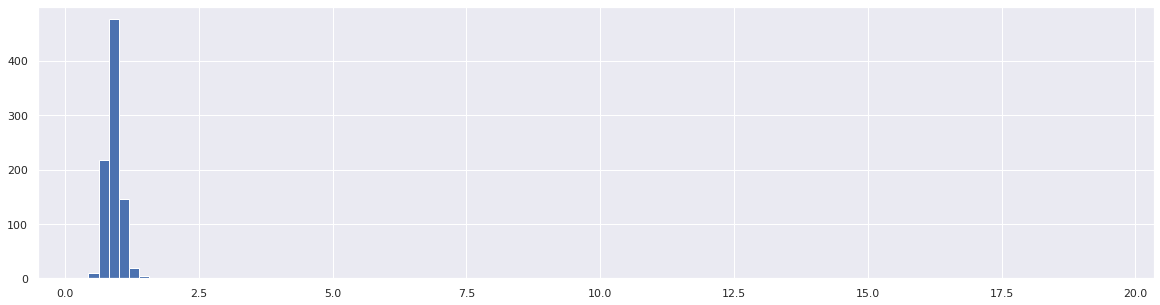

In [19]:
dados.query('"cacb2b860" in composto').describe().T['std'].hist(bins=100, figsize=(20,5))

A manipulação do tamanho das visualizações, realizada no atributo "bins", significa alterar a "resolucão" da frequência de desvios padrões (std), conforme visto no desafio anterior. Neste desafio, estamos analisando apenas o composto do tratamento com controle e, embora não conseguimos ampliar a visualização para visualizar com certeza os valores, eles estão no mesmo intervalo que o gráfico anterior. 

In [20]:
list(dados.query('"cacb2b860" in composto').describe().T['std'])

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

## Resposta do Desafio 06: Realizar outras análises com o boxplot e até com o histograma.

In [21]:
list(dados.query('"cacb2b860" in composto').describe().T['std'].unique())

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

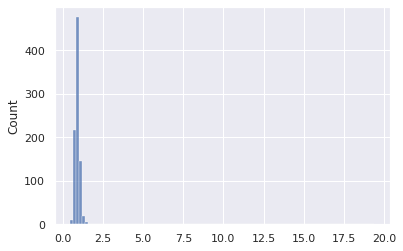

In [22]:
sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins=100)

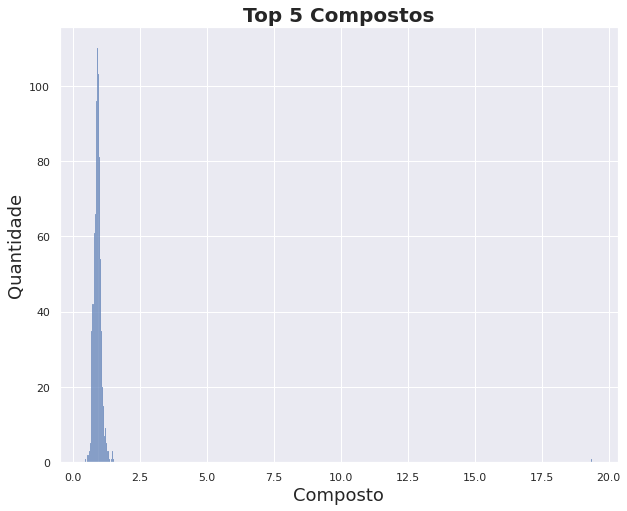

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins='auto')
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
## plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

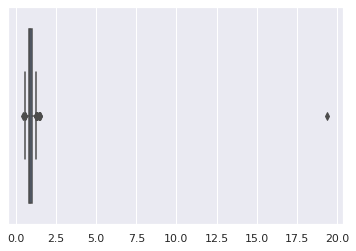

In [24]:
sns.boxplot(x=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), data=dados.query('"cacb2b860" in composto'))

In [25]:
dados.query('"cacb2b860" in composto').describe().T['std']

tempo    19.395100
g 0       0.833248
g 1       0.905735
g 2       1.016181
g 3       0.887971
           ...    
c 95      0.694797
c 96      0.740021
c 97      0.754283
c 98      0.620762
c 99      0.698150
Name: std, Length: 873, dtype: float64

In [26]:
dados.query('"cacb2b860" in composto').describe()

,tempo,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
count,1866.00000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,...,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,48.07717,-0.096364,-0.281979,-0.037559,0.090283,-0.267603,-0.085360,0.316310,-0.182888,0.395450,0.303675,0.001982,-0.058924,0.560904,0.160825,0.027359,-0.093307,0.399758,0.196112,-0.035538,-0.187553,0.270212,-0.234720,-0.242657,-0.136373,0.049421,0.240077,0.433475,-0.297664,0.429200,-0.115860,0.034545,0.146898,-0.194938,0.422112,-0.352839,0.158157,-0.082296,0.065165,-0.135357,...,0.256464,0.105946,-0.020364,0.033794,0.141150,0.169936,0.086428,0.150863,0.177403,0.177805,0.093633,0.161969,0.261134,0.468089,0.181558,0.208773,0.181058,0.114537,0.186992,0.192824,0.144163,0.198602,0.153911,0.094707,0.299793,0.150643,0.267598,0.026132,0.081472,0.026305,0.162114,0.132396,0.012933,0.273761,0.270180,0.195568,0.155791,0.161715,0.286888,0.263716
std,19.39510,0.833248,0.905735,1.016181,0.887971,1.078825,1.131637,0.963718,0.982525,0.767979,0.882228,0.986555,0.886275,1.192898,0.846441,0.907144,0.642328,1.021218,0.885206,0.610968,0.848072,0.915484,1.007721,0.689280,0.762711,0.971397,0.721966,0.939248,1.020788,0.732398,0.883715,0.779160,0.931328,0.858460,0.938971,0.826617,0.910218,0.986241,0.897315,1.008001,...,0.721539,0.681283,0.785248,0.847826,0.693472,0.656608,0.688734,0.862589,0.685118,0.679517,0.708506,0.691203,0.725634,0.698799,0.670691,0.735904,0.716457,0.740815,0.703907,0.739630,0.672806,0.911305,0.741262,0.712412,0.830997,0.729771,0.683924,0.690165,0.730209,0.681890,0.720884,0.693152,0.792459,0.698417,0.777186,0.694797,0.740021,0.754283,0.620762,0.698150
min,24.00000,-4.859000,-3.341000,-9.104000,-2.568000,-5.805000,-10.000000,-4.981000,-4.342000,-4.064000,-4.387000,-4.422000,-3.135000,-2.617000,-2.403000,-4.691000,-2.976000,-5.076000,-6.828000,-2.054000,-10.000000,-5.741000,-5.700000,-5.635000,-4.193000,-4.473000,-3.647000,-4.515000,-4.406000,-2.198000,-2.899000,-4.091000,-2.956000,-4.713000,-2.078000,-5.053000,-4.700000,-10.000000,-6.648000,-3.320000,...,-4.888000,-3.016000,-6.381000,-8.035000,-3.573000,-5.909000,-4.544000,-8.764000,-4.434000,-4.692000,-4.837000,-3.421000,-4.342000,-3.624000,-2.874000,-5.463000,-4.041000,-6.422000,-4.213000,-5.052000,-5.015000,-10.000000,-5.962000,-5.008000,-8.737000,-3.835000,-5.491000,-3.356000,-4.677000,-4.085000,-5.092000,-4.336000,-5.897000,-4.418000,-4.730000,-5.402000,-4.883000,-5.683000,-3.321000,-3.815000
25%,24.00000,-0.639000,-0.879675,-0.589150,-0.434450,-0.906775,-0.530775,-0.213975,-0.794875,-0.095325,-0.236550,-0.623950,-0.582725,-0.171375,-0.363025,-0.447025,-0.497300,-0.228900,-0.241700,-0.345675,-0.610950,-0.260425,-0.822100,-0.612600,-0.618675,-0.576750,-0.237125,-0.082800,-0.926600,-0.053050,-0.689125,-0.418325,-0.332725,-0.717850,-0.1

In [27]:
dados.query('"cacb2b860" in composto')

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,...,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.000

In [28]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
pd.set_option("display.max_columns", None)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [29]:
list(dados_resultados.columns)

['id',
 '5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibit

In [30]:
dados.query('"id_000644bb2" in id')

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

In [31]:
list(dados.columns)

['id',
 'tratamento',
 'tempo',
 'dose',
 'composto',
 'g 0',
 'g 1',
 'g 2',
 'g 3',
 'g 4',
 'g 5',
 'g 6',
 'g 7',
 'g 8',
 'g 9',
 'g 10',
 'g 11',
 'g 12',
 'g 13',
 'g 14',
 'g 15',
 'g 16',
 'g 17',
 'g 18',
 'g 19',
 'g 20',
 'g 21',
 'g 22',
 'g 23',
 'g 24',
 'g 25',
 'g 26',
 'g 27',
 'g 28',
 'g 29',
 'g 30',
 'g 31',
 'g 32',
 'g 33',
 'g 34',
 'g 35',
 'g 36',
 'g 37',
 'g 38',
 'g 39',
 'g 40',
 'g 41',
 'g 42',
 'g 43',
 'g 44',
 'g 45',
 'g 46',
 'g 47',
 'g 48',
 'g 49',
 'g 50',
 'g 51',
 'g 52',
 'g 53',
 'g 54',
 'g 55',
 'g 56',
 'g 57',
 'g 58',
 'g 59',
 'g 60',
 'g 61',
 'g 62',
 'g 63',
 'g 64',
 'g 65',
 'g 66',
 'g 67',
 'g 68',
 'g 69',
 'g 70',
 'g 71',
 'g 72',
 'g 73',
 'g 74',
 'g 75',
 'g 76',
 'g 77',
 'g 78',
 'g 79',
 'g 80',
 'g 81',
 'g 82',
 'g 83',
 'g 84',
 'g 85',
 'g 86',
 'g 87',
 'g 88',
 'g 89',
 'g 90',
 'g 91',
 'g 92',
 'g 93',
 'g 94',
 'g 95',
 'g 96',
 'g 97',
 'g 98',
 'g 99',
 'g 100',
 'g 101',
 'g 102',
 'g 103',
 'g 104',
 'g 10

## Aula 3: Correlações e causalidade
### Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.
---
### Desafio 02: Normalizar o método crosstab pela coluna.
---
### Desafio 03: Explorar outros agregadores.
---
### Desafio 04: Explorar o melt
---
### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.
---
### Desafio 06: Estudar o código que plota a matriz de correlação heatmap.
---
### Desafio 07: Resumo do que você aprendeu com os dados.

## Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.

In [32]:
i = 0
dadosResultadosColumns = []
for index in dados_resultados.columns:
  dadosResultadosColumns.append(dados_resultados.columns[i])
  i += 1

inhibitorLabels = []
text = "inhibitor"
i = 0

for index in dadosResultadosColumns:
  if text in dadosResultadosColumns[i]: 
   inhibitorLabels.append(dadosResultadosColumns[i])
  i += 1

inhibitorLabels

['5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholinesterase_inhibitor',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'angiogenesis_inhibitor',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibitor',
 'autotaxin_inhibitor',
 'bacterial_30s_ribosomal_subunit_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'bacterial_membrane_integrity_inhibitor',
 'bcl_inhibitor',
 'bcr-abl_inhibitor',
 'beta_amyloid_inhibitor',
 'bromodomain_inhibitor',
 'btk_inhibitor',
 'calcineurin_inhibitor',
 'carbonic_anhydrase_inhibitor',
 'casein_kinase_inhibitor',
 'catechol_o_methyltransferase_inhibitor',
 'cdk_inhibitor',
 'chk_inhibitor',
 'cholesterol_inhibitor',
 'coagulation_factor_inhibitor',
 'cyclooxygenase_inhibitor',
 'cyto

In [33]:
dados.head()

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

In [34]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [35]:
i = 0
dadosResultadosColumns = []
for index in dados_resultados.columns:
  dadosResultadosColumns.append(dados_resultados.columns[i])
  i += 1

otherLabels = []
text = "inhibitor"
i = 0

for index in dadosResultadosColumns:
  if text not in dadosResultadosColumns[i]: 
   otherLabels.append(dadosResultadosColumns[i])
  i += 1

otherLabels

inhibitorData=dados_resultados.drop(labels=otherLabels, axis=1) 

inhibitorData

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [36]:
inhibitorTable=pd.DataFrame(data=inhibitorData)

inhibitorTable['id'] = dados_resultados['id']

inhibitorTable.set_axis(dados_resultados['id'], axis='index', inplace=True)

inhibitorTable['n_moa'] = inhibitorTable.drop('id', axis=1).sum(axis=1)

inhibitorTable

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor,id,n_moa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000644bb2,1
id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000779bfc,0
id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000a6266a,3
id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_0015fd391,0
id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_001626bd3,0
...,...,...,...,

In [37]:
inhibitorActivation = inhibitorTable.groupby(by=['n_moa']).sum()

inhibitorActivation

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor
n_moa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,12,24,61,54,7,42,30,47,6,6,85,19,71,6,54,73,186,89,115,7,25,12,24,68,29,6,36,30,12,316,24,48,6,398,98,30,25,354,299,6,0,36,18,19,18,18,23,56,13,42,72,106,24,32,60,283,93,31,24,42,65,6,6,12,36,31,60,74,12,85,18,76,78,6,26,1,56,24,61,18,18,258,25,103,13,30,8,42,6,90,12,216,12,35,37,25,38,267,35,19,24,19,7,30,109,6,298,30,6,60,30
2,0,0,0,6,6,0,0,6,0,0,6,6,0,12,0,6,7,6,0,0,0,0,6,0,0,0,0,0,6,0,18,0,0,0,31,0,6,0,42,37,0,1,0,0,18,32,0,0,0,0,18,0,0,0,0,12,0,0,6,0,0,14,6,0,0,19,0,12,0,0,0,0,42,730,0,0,6,6,0,0,24,0,6,0,42,12,6,718,6,0,7,7,0,0,0,0,0,6,0,24,0,6,0,30,6,18,0,18,37,0,54,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,6,0,0,0,6,6,0,0,6,0,0,0,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,236,0,0,6,0,0,0,0,0,0,6,12,0,0,0,0,0,0,230,0,0,0,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,31,0
4,0,6,0,6,6,0,0,0,0,0,0,6,0,7,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,7,12,0,0,0,0,0,0,0,0,0,6,12,6,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0
5,0,0,

In [38]:
inhibitorActivation.sum().sort_values(ascending=False)

nfkb_inhibitor                           832
proteasome_inhibitor                     726
cyclooxygenase_inhibitor                 435
dna_inhibitor                            402
cdk_inhibitor                            340
                                        ... 
ubiquitin_specific_protease_inhibitor      6
protein_phosphatase_inhibitor              6
elastase_inhibitor                         6
atm_kinase_inhibitor                       6
erbb2_inhibitor                            1
Length: 112, dtype: int64

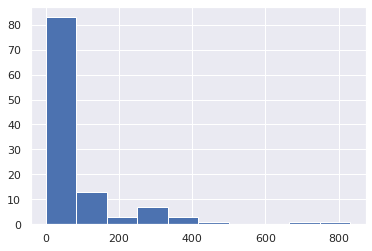

In [39]:
inhibitorActivation.sum().sort_values(ascending=False).hist()

In [40]:
inhibitorActivation.max().sort_values(ascending=False)

nfkb_inhibitor                           730
proteasome_inhibitor                     718
cyclooxygenase_inhibitor                 398
dna_inhibitor                            354
cdk_inhibitor                            316
                                        ... 
tropomyosin_receptor_kinase_inhibitor      6
ubiquitin_specific_protease_inhibitor      6
leukotriene_inhibitor                      6
protein_phosphatase_inhibitor              6
erbb2_inhibitor                            1
Length: 112, dtype: int64

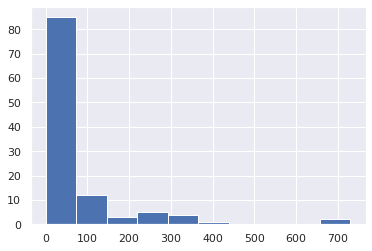

In [41]:
inhibitorActivation.max().sort_values(ascending=False).hist()

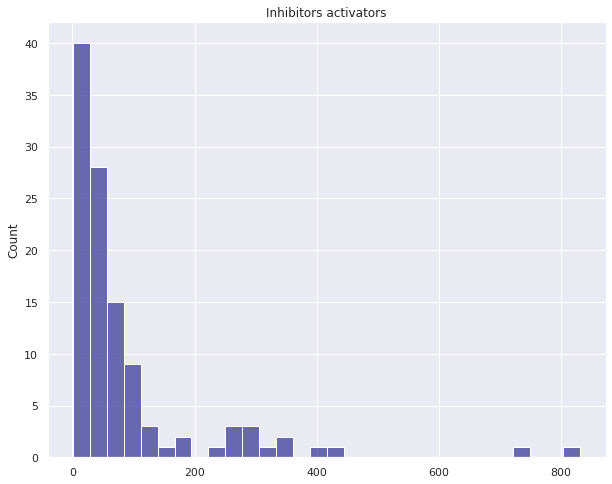

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_inhibitor = inhibitorActivation.sum().sort_values(ascending=False)
ax = sns.histplot(data=cod_inhibitor, color='#3d3d99')
ax.set_title('Inhibitors activators')
plt.show()

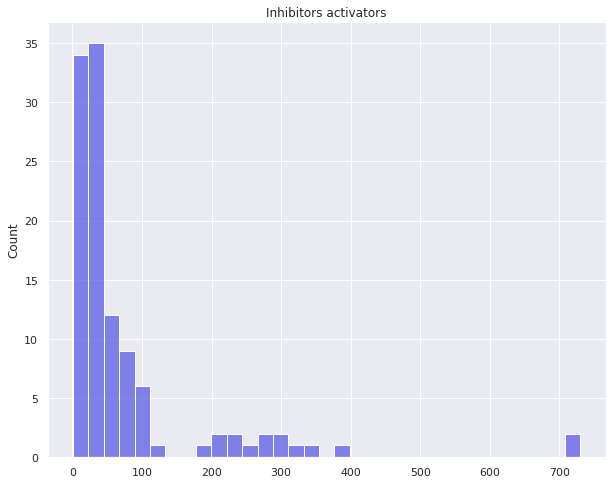

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_inhibitor = inhibitorActivation.max().sort_values(ascending=False)
ax = sns.histplot(data=cod_inhibitor, color="#5c5ce6")
ax.set_title('Inhibitors activators')
ax.set_label("Max inhibitors activators")
plt.show()

## Resposta do Desafio 02: Normalizar o método crosstab pela coluna.

In [44]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [45]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize="columns")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

##Resposta do Desafio 03: Explorar outros agregadores.

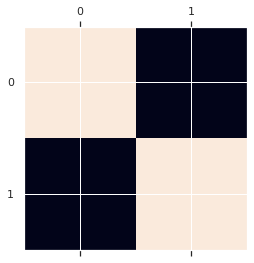

In [46]:
import matplotlib.pyplot as plt

dadosCruzados = pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

plt.matshow(dadosCruzados.corr(method='pearson'))
plt.show()

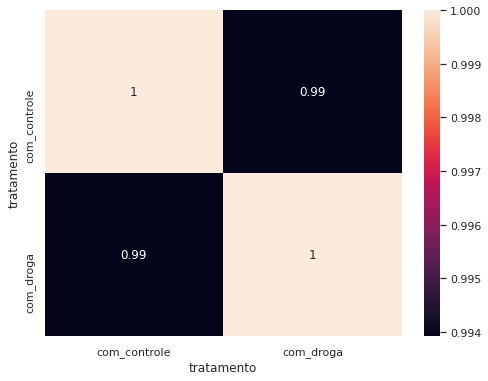

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(dadosCruzados.corr(method='pearson'), annot=True)
plt.show()

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(dadosLoc.corr(method='pearson'), annot=True)
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

## Resposta do Desafio 04: Explorar o melt

In [49]:
inhibitorTable.melt()

,variable,value
0,5-alpha_reductase_inhibitor,0
1,5-alpha_reductase_inhibitor,0
2,5-alpha_reductase_inhibitor,0
3,5-alpha_reductase_inhibitor,0
4,5-alpha_reductase_inhibitor,0
...,...,...
2714791,n_moa,0
2714792,n_moa,0
2714793,n_moa,0
2714794,n_moa,1


Não entendi muito bem a utilidade desse método, além de trnasformar todo os dados da tabela em linhas.

## Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [50]:
dadosGenes = dados.loc[:, 'g 0':'g 771'].describe()

dadosGenes

# dadosCrosstab = pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g 0'], aggfunc='mean')

# dadosCrosstab

,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g 679,g 680,g 681,g 682,g 683,g 684

A princípio, estou pensando em obter o valor médio de todos os valores de genes e contrapor com os mesmos das células, e tentar encontrar uma correlação a partir disso. 

In [51]:
dadosGenes['g 0'].values[1]

0.24836629293692816

In [52]:
import pandas as pd
import numpy as np


dadosGenesMean = []
genesTitle = []
i = 0

for index in dadosGenes.columns:
  if "g" in index:
    genesTitle.append(dadosGenes.columns[i])
    dadosGenesMean.append(dadosGenes[genesTitle[i]].values[1])
  i+=1


print("O valor médio dos genes é:", np.mean(dadosGenesMean))

O valor médio dos genes é: 0.009009573150247708


In [53]:
dadosCels = dados.loc[:, 'c 0':'c 99'].describe()

dadosCels

,c 0,c 1,c 2,c 3,c 4,c 5,c 6,c 7,c 8,c 9,c 10,c 11,c 12,c 13,c 14,c 15,c 16,c 17,c 18,c 19,c 20,c 21,c 22,c 23,c 24,c 25,c 26,c 27,c 28,c 29,c 30,c 31,c 32,c 33,c 34,c 35,c 36,c 37,c 38,c 39,c 40,c 41,c 42,c 43,c 44,c 45,c 46,c 47,c 48,c 49,c 50,c 51,c 52,c 53,c 54,c 55,c 56,c 57,c 58,c 59,c 60,c 61,c 62,c 63,c 64,c 65,c 66,c 67,c 68,c 69,c 70,c 71,c 72,c 73,c 74,c 75,c 76,c 77,c 78,c 79,c 80,c 81,c 82,c 83,c 84,c 85,c 86,c 87,c 88,c 89,c 90,c 91,c 92,c 93,c 94,c 95,c 96,c 97,c 98,c 99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,-0.486027,-0.473410,-0.508091,-0.510905,-0.306528,-0.452293,-0.337267,-0.473728,-0.619461,-0.330389,-0.454165,-0.496059,-0.383134,-0.295655,-0.443384,-0.449683,-0.597730,-0.431899,-0.501831,-0.288958,-0.385486,-0.434420,-0.322990,-0.545691,-0.461527,-0.350457,-0.477049,-0.209301,-0.598003,-0.397430,-0.478680,-0.470118,-0.482906,-0.452191,-0.432553,-0.508888,-0.414540,-0.460295,-0.518600,-0.391396,-0.393122,-0.455564,-0.465604,-0.370165,-0.415772,-0.490691,-0.279073,-0.456478,-0.300344,-0.543752,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,2.066695,2.058766,2.140051,2.170919,1.575507,1.974010,1.594663,2.079550,2.294899,1.641563,2.001374,2.023053,1.690235,1.536784,1.967079,1.899095,2.268931,1.916467,1.904629,1.521773,1.741182,1.988458,1.772399,2.201552,1.974772,1.751440,1.965178,1.287766,2.297375,1.838205,1.996177,1.986078,2.034266,1.973985,1.934618,2.106452,1.792287,1.874856,2.042422,1.721804,1.794246,1.964342,2.007252,1.752329,1.835249,2.121213,1.477614,1.901738,1.238406,2.158330,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.

In [54]:
import pandas as pd
import numpy as np

dadosCelMean = []
celTitle = []
i = 0

for index in dadosCels.columns:
  if "c" in index:
    celTitle.append(dadosCels.columns[i])
    dadosCelMean.append(dadosCels[celTitle[i]].values[1])
  i+=1


print("O valor médio das células é:", np.mean(dadosCelMean))

O valor médio das células é: -0.43223128483245143


In [56]:
dadosGenesTitles = []
i = 0

for index in dadosGenes.columns:
  if i<100:
    dadosGenesTitles.append(dadosGenes.columns[i])
    i+=1


dadosCelTitles = []
i=0
for index in dadosCels.columns:
  dadosCelTitles.append(dadosCels.columns[i])
  i+=1

In [57]:
firstHundredGenes = []
i = 0

for i in range(100):
  firstHundredGenes.append(dadosGenesMean[i])


dadosCelAndGenes = pd.DataFrame(firstHundredGenes)

mapa = {0:'Genes'}
dadosCelAndGenes.rename(columns=mapa, inplace = True)

dadosCelAndGenes['Cels'] = (dadosCelMean)

dadosCelAndGenes.corr()

,Genes,Cels
Genes,1.000000,-0.038108
Cels,-0.038108,1.000000


O que eu preciso fazer é transformar todos os valores de genes em linhas e de células em linhas, e atribuir duas categorias de gene ou célula, para correlacionar por isso. Mas, para isso, preciso considerar apenas os 100 primeiros genes porque existem mais do que as células. Isso é importante porque se não a correlação ficará desproporcional. Ainda não consigo saber o que esses dados são na realidade. Pra mim, eles podem ser qualquer coisa, e isso dá um nó no cérebro. Mas, talvez depois de ler o PDF do livro que me indicaram, fique mais visível.

In [61]:
dadosCelAndGenes['id'] = dados_resultados['id']

dadosCelAndGenes

,Genes,Cels,id
0,0.248366,-0.355156,id_000644bb2
1,-0.095684,-0.455359,id_000779bfc
2,0.152253,-0.480542,id_000a6266a
3,0.081971,-0.377666,id_0015fd391
4,0.057347,-0.493552,id_001626bd3
...,...,...,...
95,0.190986,-0.353726,id_010385a91
96,-0.419490,-0.463485,id_010629f4f
97,0.219582,-0.378241,id_0106bfcfd
98,-0.259191,-0.470252,id_010aa48d5


Agora que eu consegui correlacionar as duas categorias de "produto biológico" de teste, vou tentar encontrar as respectivas ativações de MoA, no banco de dados de resultados, para aí tentar encontrar um padrão de ativação nessa amostra de 100 genes versus 100 células humanas.

In [87]:
#dados_resultados.loc[0:100,'5-alpha_reductase_inhibitor']
column = []
column['id'] = dados_resultados['id']

for index in dados_resultados.columns:
  column[str(i)] = dados_resultados[i]
  if column['id'].value[row]


0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: 5-alpha_reductase_inhibitor, Length: 101, dtype: int64

## Aula 4: Merge e Análise de Resultados
### Desafio 01: Encontrar o top 10 das ações do MOA (inibidor, agonista,...)
---
### Desafio 02: Cria a coluna chamada eh_controle para quando na linha tratamento for igual a com_controle
---
### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
---
### Desafio 04: Estudar sobre combinações DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
---
### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições. Escolher uma droga e comparar com controle.
---
### Desafio 06: Descobrir se tempo algum composto que dependendo da configuração do experimento, ativa ou não algum MOA.
---
### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa um MOA diferente.
---
### Desafio 08: Resumir o que você aprendeu.

## Aula 05: Machine Learning e Sci-kit Learning
### Desafio 01: Tentar outros modelos ou mudar os parâmetros dos modelos que testamos na aula.
---
### Desafio 02: Estudar a documentação do Sklearn.
---
### Desafio 03: Pesquisar o fluxograma escolhendo o melhor modelo.
---
### Desafio 04: Testar outras soluções. 0, 1 ou +
---
### Desafio 05: escolha uma droga mais utilizada e tentar criar um modelo para prever essa label.